### Autores:  
Blanco García, Gabriel: gabriel.blanco@cunef.edu  
Ferrín Meilán, Michelle: michelle.ferrin@cunef.edu

## Colegio Universitario de Estudios Financieros
### Máster en Data Science para Finanzas
Madrid, diciembre de 2020

# Simulación de puesta en producción

Este notebook consiste en una simulación de la puesta en producción del modelo y del sistema construido. Se leen los datos raw, que han de ser tratatados y preprocesados para que el modelo pueda utilizarlos. También se calculan métricas del modelo.

In [43]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scikitplot as skplt # gráfico de curvas ROC

from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix # Matriz confusion
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

%run ../src/lectura_y_preprocesado.ipynb
%run ../src/plots_metricas.ipynb
%run ../src/operar_modelos.ipynb

### Modelo

In [2]:
XGBoost = cargar_modelo('../models/trained_models/Best_XGBoost.sav')

In [3]:
XGBoost = XGBoost.best_estimator_

### Datos

In [4]:
path = '../data/production/Loan_test_set.csv' # el path de los datos de producción

In [15]:
datos = lectura_limpia(path) # los leemos con la función de lectura y preprocesado que hemos programado

In [14]:
datos

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,pub_rec,application_type,annual_inc_joint,dti_joint,mort_acc,pub_rec_bankruptcies,rating_fico
16,3600,36 months,7.49,A,10+ years,MORTGAGE,120000.0,Paga,other,18.90,11 o menos,Individual,NaN,NaN,0,7 o menos,Exceptional
22,4000,36 months,10.49,B,2 years,RENT,50000.0,No paga,major_purchase,33.61,11 o menos,Individual,NaN,NaN,6,7 o menos,Exceptional
26,8400,36 months,11.39,B,8 years,MORTGAGE,50000.0,No paga,other,15.63,11 o menos,Individual,NaN,NaN,4,7 o menos,Exceptional
38,35000,60 months,25.49,E,10+ years,MORTGAGE,114000.0,Paga,home_improvement,14.04,11 o menos,Individual,NaN,NaN,4,7 o menos,Exceptional
40,17000,36 months,7.49,A,10+ years,MORTGAGE,120000.0,Paga,debt_consolidation,8.41,11 o menos,Individual,NaN,NaN,2,7 o menos,Exceptional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96746,10425,36 months,13.49,C,< 1 year,RENT,51000.0,Paga,debt_consolidation,33.41,11 o menos,Individual,NaN,NaN,0,7 o menos,Exceptional
96750,15000,36 months,11.39,B,10+ years,RENT,142000.0,Paga,debt_consolidation,23.39,11 o menos,Individual,NaN,NaN,1,7 o menos,Exceptional
96761,29900,60 months,25.49,E,10+ years,RENT,68000.0,No paga,debt_consolidation,22.59,11 o menos,Individual,NaN,NaN,0,7 o menos,Exceptional
96763,22000,36 months,7.99,A,10+ years,OWN,80000.0,Paga,debt_consolidation,14.90,11 o menos,Individual,NaN,NaN,1,7 o menos,Exceptional


In [6]:
# Necesario dividir entre x e y
X_test = datos.drop('loan_status', axis=1)
y_test = datos['loan_status']

Calculamos las métricas del modelo

### ROC

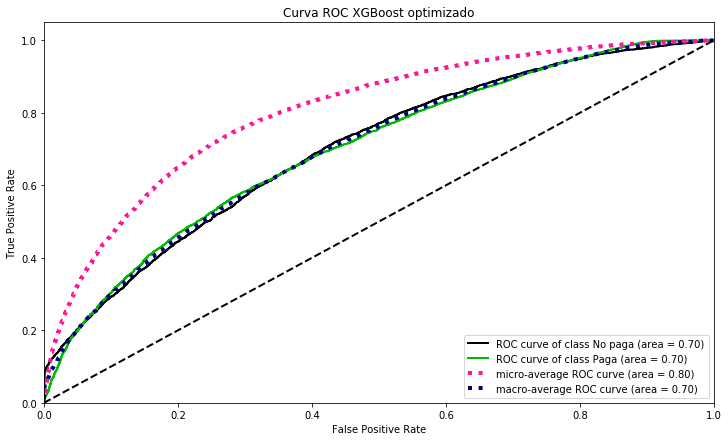

In [9]:
grafico_roc(XGBoost, 'Curva ROC XGBoost optimizado')

Sacamos la ROC con el punto óptimo

 El umbral óptimo es 0.64


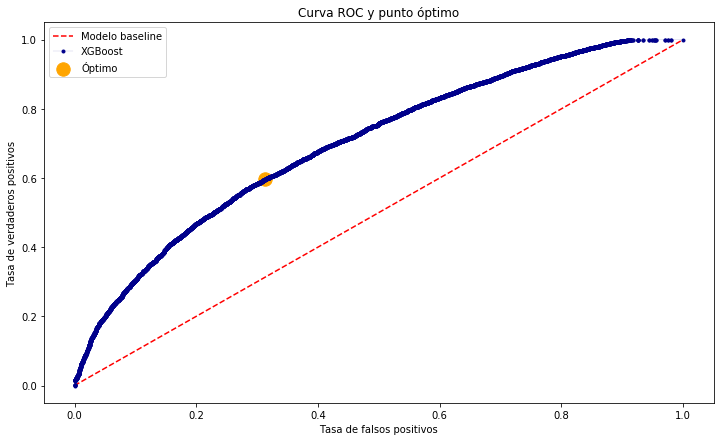

In [44]:
roc_punto_optimo(XGBoost, 'Paga', 'XGBoost')

###  Accuracy

In [10]:
accuracy(XGBoost)

0.7315269606520214

In [12]:
prediccion_XGBoost = XGBoost.predict(X_test)

In [8]:
probabilidad_prediccion_XGBoost = XGBoost.predict_proba(X_test)

### Matriz de confusión normalizada

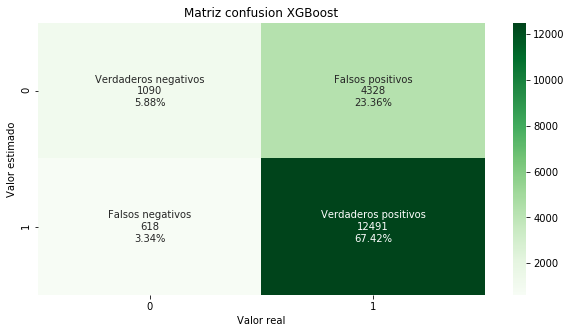

In [13]:
plot_matriz_confusion(XGBoost, 'Matriz confusion XGBoost')

### Métricas 

In [13]:
print(classification_report(y_test, prediccion_XGBoost))

              precision    recall  f1-score   support

     No paga       0.63      0.19      0.30      5418
        Paga       0.74      0.95      0.83     13109

    accuracy                           0.73     18527
   macro avg       0.69      0.57      0.57     18527
weighted avg       0.71      0.73      0.68     18527



## Curva de ganancia acumulada

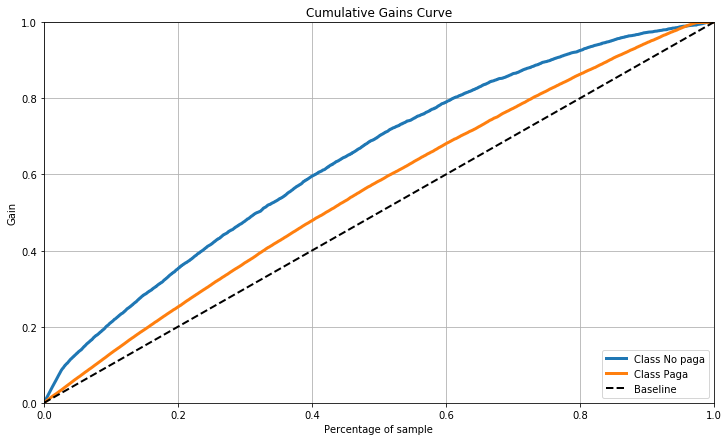

In [17]:
skplt.metrics.plot_cumulative_gain(y_test, probabilidad_prediccion_XGBoost, figsize=(12, 7));

##  Curva precision recall

 El nivel de probabilidad que optimiza la F1  es 0.84


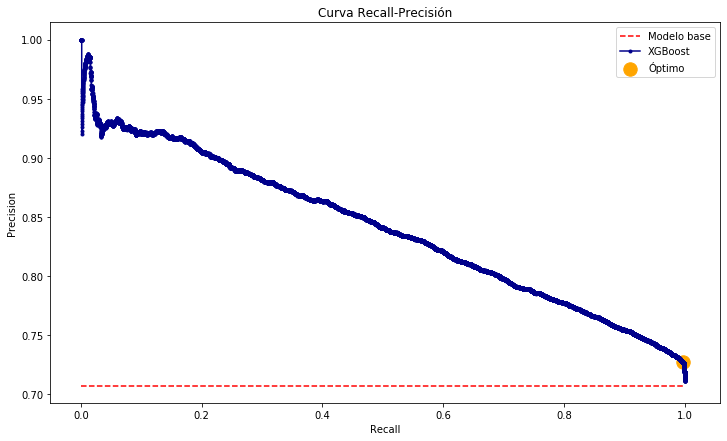

In [42]:
precision_recall_punto_optimo(XGBoost, 'Paga', 'XGBoost')

## Lift curve

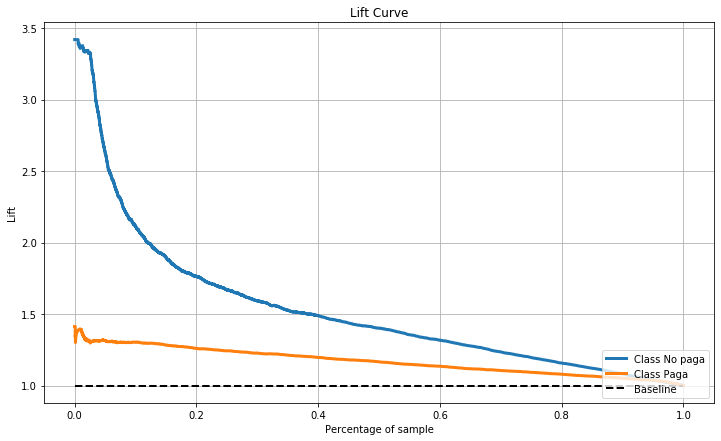

In [26]:
skplt.metrics.plot_lift_curve(y_test, probabilidad_prediccion_XGBoost, figsize=(12, 7));